In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_excel('insurance2.xlsx')

In [67]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [70]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [71]:
df1 = pd.get_dummies(df,drop_first='True').astype(int)

In [72]:
df1.head()

age  bmi  children  charges  sex_male  smoker_yes  region_northwest  \
0   19   27         0    16884         0           1                 0   
1   18   33         1     1725         1           0                 0   
2   28   33         3     4449         1           0                 0   
3   33   22         0    21984         1           0                 1   
4   32   28         0     3866         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0

In [73]:
df1.describe()

age          bmi     children       charges     sex_male  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025    30.169656     1.094918  13269.928999     0.505232   
std      14.049960     6.119875     1.205493  12110.012755     0.500160   
min      18.000000    15.000000     0.000000   1121.000000     0.000000   
25%      27.000000    26.000000     0.000000   4740.000000     0.000000   
50%      39.000000    30.000000     1.000000   9381.500000     1.000000   
75%      51.000000    34.000000     2.000000  16639.250000     1.000000   
max      64.000000    53.000000     5.000000  63770.000000     1.000000   

        smoker_yes  region_northwest  region_southeast  region_southwest  
count  1338.000000       1338.000000       1338.000000       1338.000000  
mean      0.204783          0.242900          0.272048          0.242900  
std       0.403694          0.428995          0.445181          0.428995  
min       0.000000          0.000000          0.000000          0.000000  
25%       0.000000          0.000000          0.000000          0.000000  
50%       0.000000          0.000000          0.000000          0.000000  
75%       0.000000          0.000000          1.000000          0.000000  
max       1.000000          1.000000          1.000000          1.000000

In [74]:
df1.describe().T

count          mean           std     min     25%     50%  \
age               1338.0     39.207025     14.049960    18.0    27.0    39.0   
bmi               1338.0     30.169656      6.119875    15.0    26.0    30.0   
children          1338.0      1.094918      1.205493     0.0     0.0     1.0   
charges           1338.0  13269.928999  12110.012755  1121.0  4740.0  9381.5   
sex_male          1338.0      0.505232      0.500160     0.0     0.0     1.0   
smoker_yes        1338.0      0.204783      0.403694     0.0     0.0     0.0   
region_northwest  1338.0      0.242900      0.428995     0.0     0.0     0.0   
region_southeast  1338.0      0.272048      0.445181     0.0     0.0     0.0   
region_southwest  1338.0      0.242900      0.428995     0.0     0.0     0.0   

                       75%      max  
age                  51.00     64.0  
bmi                  34.00     53.0  
children              2.00      5.0  
charges           16639.25  63770.0  
sex_male              1.00      1.0  
smoker_yes            0.00      1.0  
region_northwest      0.00      1.0  
region_southeast      1.00      1.0  
region_southwest      0.00      1.0

# Data Visualization

<Figure size 1200x1200 with 0 Axes>

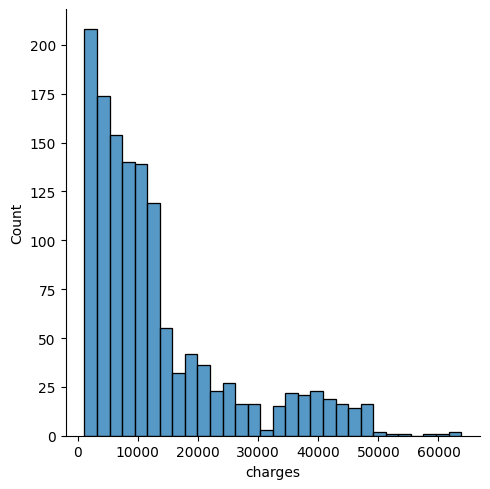

In [75]:
plt.figure(figsize=(12,12))
sns.displot(df1['charges'])

<Axes: >

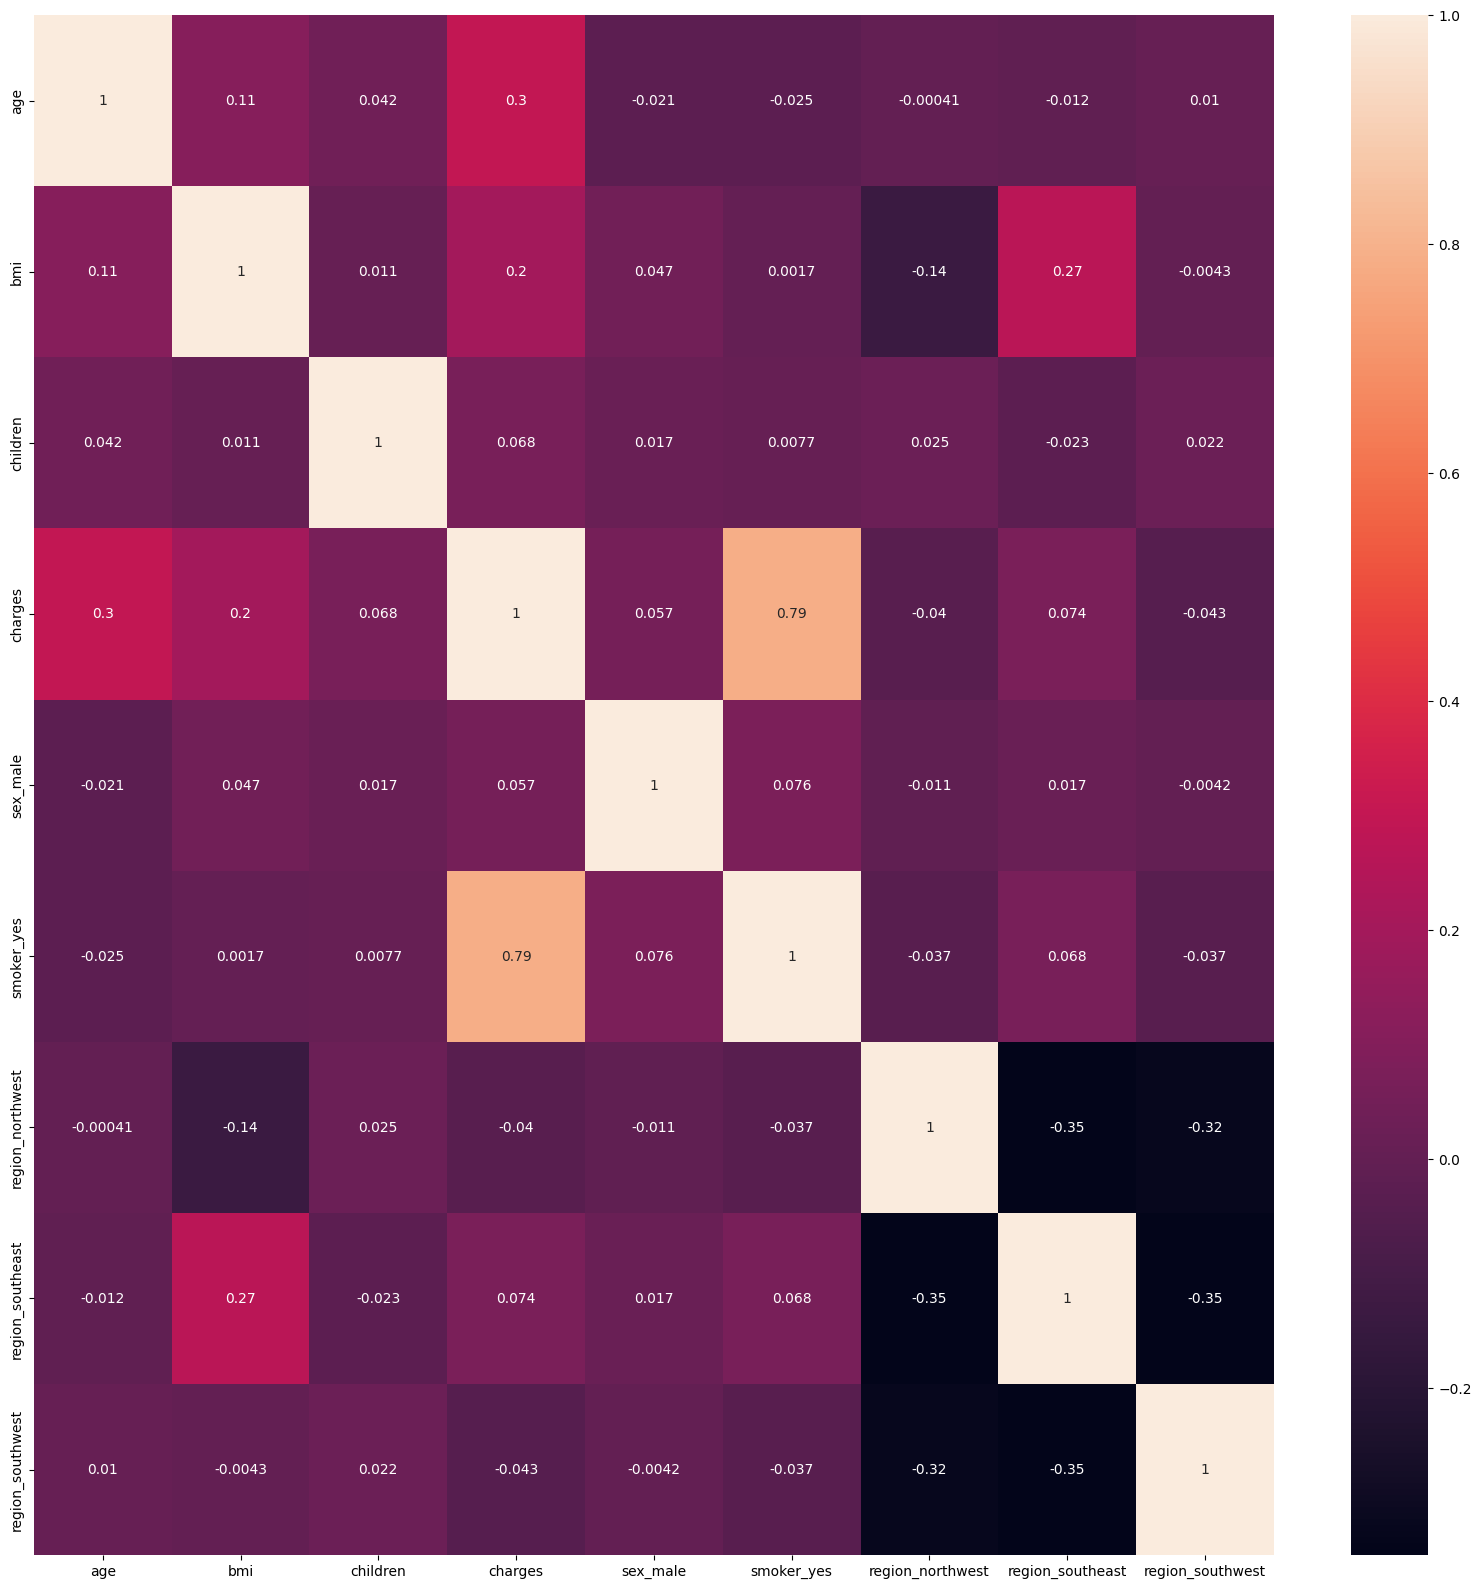

In [76]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)

In [77]:
x = df1.drop('charges',axis=1)
y = df1['charges']

In [78]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=78)

In [79]:
xtrain.head()

age  bmi  children  sex_male  smoker_yes  region_northwest  \
62    64   24         1         1           0                 1   
861   38   28         3         0           0                 0   
973   19   40         0         0           0                 0   
209   40   41         1         1           0                 0   
849   55   32         0         1           0                 1   

     region_southeast  region_southwest  
62                  0                 0  
861                 0                 1  
973                 0                 1  
209                 0                 0  
849                 0                 0

In [80]:
ytrain.head()

62     30166
861     7151
973     1759
209     6610
849    10601
Name: charges, dtype: int32

In [81]:
xtest.head()

age  bmi  children  sex_male  smoker_yes  region_northwest  \
160    42   26         0         0           1                 1   
1326   42   32         0         0           0                 0   
544    54   30         0         1           0                 1   
624    59   28         0         1           0                 1   
914    33   24         2         1           0                 1   

      region_southeast  region_southwest  
160                  0                 0  
1326                 0                 0  
544                  0                 0  
624                  0                 0  
914                  0                 0

In [82]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [83]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [84]:
pred = reg.predict(xtest)
pred

array([31778.30775701,  9922.72179583, 11911.91022321, 12550.05776367,
        5269.26475863, 14956.37145788,  7000.07725648,  9906.28272201,
       31587.20379237, 35745.39855955,  7877.40277983, 10319.86498212,
        3323.44783882, 10027.44856168, 35972.50637242,  5749.40356481,
        7086.8590348 , 30734.83490394, 29323.5372536 , 34460.10908492,
       14996.21240023, 11426.97545119,  3962.05089451,  1749.67304713,
        9030.53345465, 31304.9534421 , 30128.74362544,  2757.37591899,
       10489.24923089, 29955.31228713,  3271.08193754,  8209.34352422,
        3136.27470855, 15254.08956875, 31136.6848974 , 10573.95570711,
        3259.28940202, 11717.82494882,   540.71258197, 13936.03773043,
         295.36037238,  8737.71749138,  9501.87777304, 27810.67941418,
       13360.58330415,  6182.55059932,  7594.54720169, 13901.62185339,
        2795.84527896, 25706.94748424,  4921.723279  ,  4045.44176075,
        9178.32115779,  8444.6408821 ,  -725.42887029,  7303.15806687,
      

In [85]:
df_pred = pd.DataFrame({'Actual': ytest, 'Prediction': pred, 'Difference': abs(ytest-pred)})
df_pred.head()

Actual    Prediction    Difference
160    21348  31778.307757  10430.307757
1326    7050   9922.721796   2872.721796
544    10231  11911.910223   1680.910223
624    12129  12550.057764    421.057764
914     5257   5269.264759     12.264759

In [86]:
m = reg.coef_
m

array([  263.80127993,   340.42942959,   469.87899576,    52.36590128,
       24446.09651262,  -547.93397387, -1188.44112942, -1205.48514601])

In [87]:
c = reg.intercept_
c

-12050.673708265187

In [88]:
Log_score = reg.score(xtest,ytest)

In [89]:
Log_score

0.7213754975609934

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [91]:
ytest.head()

160     21348
1326     7050
544     10231
624     12129
914      5257
Name: charges, dtype: int32

In [92]:
mae1 = mean_absolute_error(ytest,pred)

In [93]:
mae1

4173.4991703404075

In [94]:
mse1 = mean_squared_error(ytest,pred)

In [95]:
mse1

36202474.84617753

In [96]:
data = {'Name':['Logistic_mae','Logistic_mse','Logistic_accuracy'],
       'Accuracy':[mae1,mse1,Log_score]}
df_after_pred = pd.DataFrame(data=data)

In [97]:
df_after_pred.head()

Name      Accuracy
0       Logistic_mae  4.173499e+03
1       Logistic_mse  3.620247e+07
2  Logistic_accuracy  7.213755e-01

<Axes: xlabel='Accuracy', ylabel='Name'>

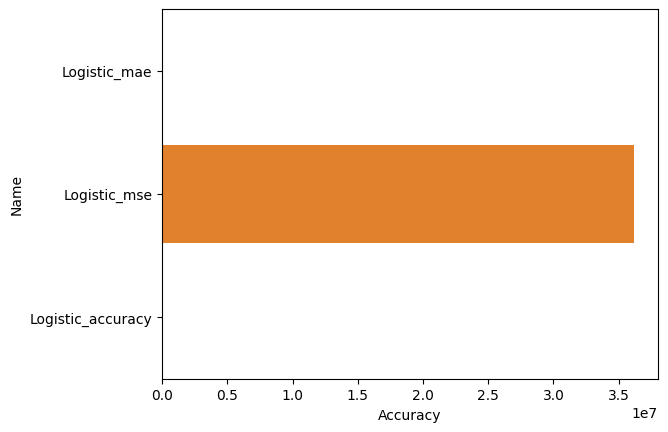

In [98]:
sns.barplot(x='Accuracy',y='Name',data=df_after_pred)

# Applying KNN

In [99]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [100]:
df2 = df.copy()

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
le = LabelEncoder()

In [103]:
df2.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [104]:
from pandas.core.dtypes.common import is_numeric_dtype

In [105]:
for i in df2.columns:
    if is_numeric_dtype(df2[i]):
        continue
    else:
        df2[i] = le.fit_transform(df2[i])

In [106]:
df2.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [107]:
x = df2.drop('charges',axis=1)
y = df2['charges']

In [108]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=78)

In [109]:
xtrain.head()

age  sex     bmi  children  smoker  region
62    64    1  24.700         1       0       1
861   38    0  28.000         3       0       3
973   19    0  40.500         0       0       3
209   40    1  41.230         1       0       0
849   55    1  32.775         0       0       1

In [110]:
ytrain.head()

62     30166.61817
861     7151.09200
973     1759.33800
209     6610.10970
849    10601.63225
Name: charges, dtype: float64

In [111]:
xtest.head()

age  sex     bmi  children  smoker  region
160    42    0  26.600         0       1       1
1326   42    0  32.870         0       0       0
544    54    1  30.210         0       0       1
624    59    1  28.785         0       0       1
914    33    1  24.605         2       0       1

In [112]:
ytest.head()

160     21348.70600
1326     7050.02130
544     10231.49990
624     12129.61415
914      5257.50795
Name: charges, dtype: float64

In [113]:
from sklearn.neighbors import KNeighborsRegressor

In [114]:
 ne = KNeighborsRegressor()

In [129]:
ne = ne.fit(xtrain,ytrain)
ne

KNeighborsRegressor()

In [117]:
pred = ne.predict(xtest)
pred

array([12874.13304  , 13028.46556  , 19412.193502 , 15777.896202 ,
        7443.328862 , 15104.343912 , 19125.90898  , 12301.70639  ,
        6377.0494   , 19417.970998 , 20453.132916 ,  5103.02032  ,
        8261.09119  , 13932.486942 , 20198.930764 , 11147.49174  ,
       14785.08715  , 16061.73351  ,  8152.190112 ,  6988.15699  ,
       24351.30426  ,  9913.36071  ,  3254.67244  ,  3156.48049  ,
       18971.62101  , 14187.943978 , 16004.4521   ,  5129.77881  ,
        9716.145414 ,  8737.57039  ,  8435.46104  , 10361.54458  ,
        1422.55854  , 33916.08512  ,  8471.18359  , 11235.62706  ,
        2231.94811  , 19827.165054 ,  5624.24063  , 11981.5025   ,
        5838.354906 , 21584.508244 , 11120.223362 , 14789.81738  ,
       18394.345248 , 11161.581    ,  5040.39934  , 13113.283022 ,
        7965.02172  ,  1790.21222  ,  8039.64828  ,  2354.72488  ,
       15491.004556 , 12082.25992  ,  1796.75234  , 16454.37216  ,
       10149.29681  ,  7305.12287  , 14328.772198 , 16969.5260

In [118]:
ytest.head()

160     21348.70600
1326     7050.02130
544     10231.49990
624     12129.61415
914      5257.50795
Name: charges, dtype: float64

In [119]:
Log_score = ne.score(xtest,ytest)

In [120]:
Log_score

0.1239003840616123

In [121]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [122]:
mae2 = mean_absolute_error(ytest,pred)

In [123]:
mae2

7615.323471776617

In [124]:
mse2 = mean_squared_error(ytest,pred)

In [125]:
mse2

113834300.3487436

In [126]:
data = {'Name':['KNN_mae','KNN_mse','KNN_accuracy'],
       'Accuracy':[mae2,mse2,Log_score]}
df_after_pred2 = pd.DataFrame(data=data)

In [127]:
df_after_pred2.head()

Name      Accuracy
0       KNN_mae  7.615323e+03
1       KNN_mse  1.138343e+08
2  KNN_accuracy  1.239004e-01

<Axes: xlabel='Accuracy', ylabel='Name'>

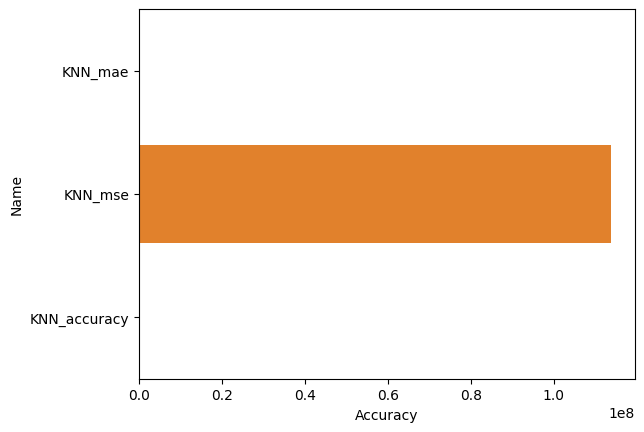

In [128]:
sns.barplot(x='Accuracy',y='Name',data= df_after_pred2)